# Predict future sales 

dataset that is taken from kaggel

### Task

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month.

**File descriptions**
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

**Data fields**
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=3, suppress=True)

In [3]:
df = pd.read_csv('sales_train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

In [4]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00


In [5]:
df[df.item_cnt_day > 1].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
9,03.01.2013,0,25,2573,299.00,3.00
10,03.01.2013,0,25,2574,399.00,2.00
13,08.01.2013,0,25,2574,399.00,2.00
15,11.01.2013,0,25,2574,399.00,2.00
47,10.01.2013,0,25,2746,299.00,2.00


In [6]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.50
1,1,0.50
2,2,0.50
3,3,0.50
4,4,0.50


item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

In [8]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
item_categories[item_categories.item_category_id == 40]

,item_category_name,item_category_id
40,Кино - DVD,40


In [11]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
df.shape

(2935849, 6)

In [13]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,"2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00"
mean,14.57,33.00,"10,197.23",890.85,1.24
std,9.42,16.23,"6,324.30","1,729.80",2.62
min,0.00,0.00,0.00,-1.00,-22.00
25%,7.00,22.00,"4,476.00",249.00,1.00
50%,14.00,31.00,"9,343.00",399.00,1.00
75%,23.00,47.00,"15,684.00",999.00,1.00
max,33.00,59.00,"22,169.00","307,980.00","2,169.00"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [15]:
date_block_value_counts = df.date_block_num.value_counts()

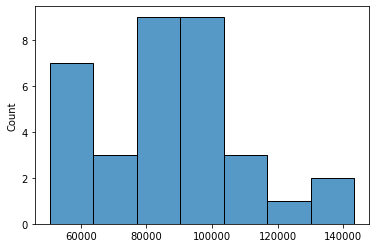

In [16]:
sns.histplot(date_block_value_counts.values);

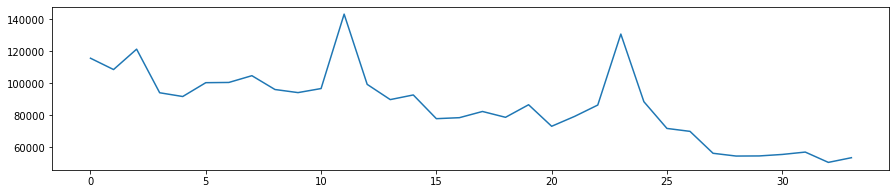

In [17]:
plt.figure(figsize=(15, 3))
sns.lineplot(x=date_block_value_counts.index, y=date_block_value_counts.values);

In [18]:
date_value_counts = df.date.value_counts()
date_value_counts.head()

28.12.2013    9434
29.12.2013    9335
30.12.2014    9324
30.12.2013    9138
31.12.2014    8347
Name: date, dtype: int64

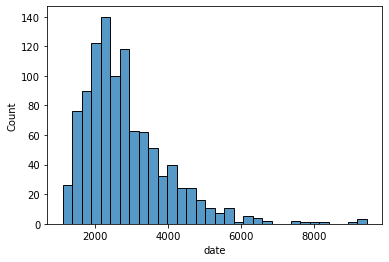

In [51]:
sns.histplot(date_value_counts);

In [19]:
target = df.item_cnt_day
target.head()

0    1.00
1    1.00
2   -1.00
3    1.00
4    1.00
Name: item_cnt_day, dtype: float64

In [20]:
target.unique()

array([   1.,   -1.,    3.,    2.,    4.,    5.,   13.,    7.,    6.,
          8.,   10.,   11.,   30.,   22.,   14.,   15.,    9.,   12.,
         17.,   19.,   20.,   -5.,   -6.,   -3.,   -2.,   16.,   64.,
         18.,   29.,   26.,   39.,   21.,   27.,   53.,   25.,   23.,
         24.,   40.,   28.,   31.,   36.,   -4.,   32.,   35.,   41.,
         88.,   44.,   52.,   56.,   38.,   34.,   57.,   69.,   37.,
         47.,   50.,   48.,   33.,   61.,   80.,   42.,   82.,  200.,
        100.,   76.,   77.,  107.,   46.,   49.,   70.,   55.,   60.,
         45.,   71.,   65.,  150.,   85.,   89.,   43.,   58.,  217.,
        104.,   84.,  168.,   92.,  156.,   68.,   62.,  264.,  110.,
         83.,  133.,   51.,  148.,   54.,   67.,  106.,  109.,  102.,
         90.,  288.,  171.,  131.,   87.,   78.,  151.,   59.,  113.,
        118.,  127.,   97.,  135.,  -22.,  103.,  111.,   96.,  242.,
        105.,   72.,  126.,   73.,  101.,   91.,   63.,  194.,  255.,
         98.,   81.,

In [21]:
target.head()

0    1.00
1    1.00
2   -1.00
3    1.00
4    1.00
Name: item_cnt_day, dtype: float64

In [22]:
target_value_counts = target.value_counts()

In [23]:
target_value_counts

1.00      2629372
2.00       194201
3.00        47350
4.00        19685
5.00        10474
           ...   
179.00          1
187.00          1
194.00          1
195.00          1
508.00          1
Name: item_cnt_day, Length: 198, dtype: int64

In [24]:
df.head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00


In [25]:
target.min()

-22.0

In [26]:
df.item_price.min()

-1.0

In [27]:
df['item_price'] = df['item_price'] + np.absolute(df.item_price.min()) + 1

In [28]:
df.item_price.min()

1.0

In [29]:
target = target + np.absolute(target) + 1

In [30]:
target.min()

1.0

In [31]:
log_target = np.log(target)
log_item_price = np.log(df.item_price)

In [32]:
df.head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,"1,001.00",1.00


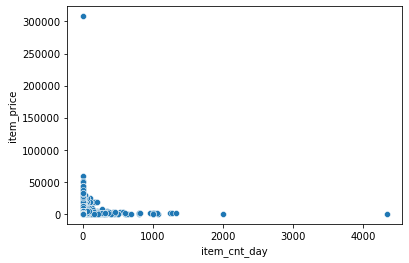

In [45]:
sns.scatterplot(x=target, y=df.item_price);

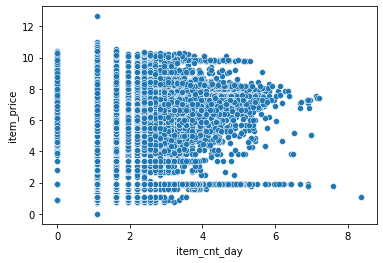

In [47]:
sns.scatterplot(x=log_target, y=log_item_price);

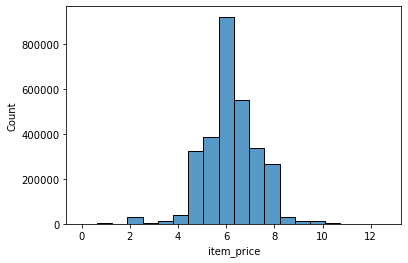

In [39]:
sns.histplot(np.log(df.item_price), bins=20);

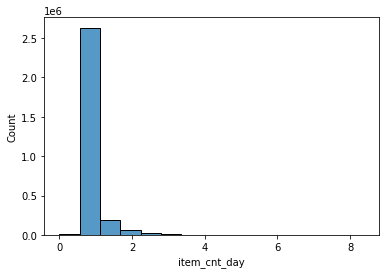

In [42]:
sns.histplot(log_target, bins=15);